In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import missingno as msno


df_PS = pd.read_csv("src/PS_LibreAcces_Personne_activite_202502190859.txt", sep="|", dtype=str)
df_communes = pd.read_csv("src/communes-france-2025.csv", sep=",", dtype=str)
df_arrondissements_paris = pd.read_csv("src/dep75.csv", sep=",",dtype=str)

In [2]:
df_demo_PS = pd.read_csv("src/demographie-effectifs-et-les-densites(1).csv", sep=";",dtype=str)

In [3]:
df_demo_PS

,﻿annee,profession_sante,region,libelle_region,departement,libelle_departement,classe_age,libelle_classe_age,libelle_sexe,effectif,densite,vision generale all,vision_generale_prescriptions,vision profession territoire
0,2023,Oto-rhino-laryngologistes,44,Grand Est,51,Marne,35-39,de 35 à 39 ans,femmes,0,NaN,oui,oui,oui
1,2023,Oto-rhino-laryngologistes,44,Grand Est,51,Marne,35-39,de 35 à 39 ans,sexe inconnu,0,NaN,oui,oui,oui
2,2023,Oto-rhino-laryngologistes,44,Grand Est,51,Marne,35-39,de 35 à 39 ans,tout sexe,0,NaN,oui,oui,oui
3,2023,Oto-rhino-laryngologistes,44,Grand Est,51,Marne,40-44,de 40 à 44 ans,femmes,2,NaN,oui,oui,oui
4,2023,Oto-rhino-laryngologistes,44,Grand Est,51,Marne,40-44,de 40 à 44 ans,tout sexe,2,NaN,oui,oui,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219835,2018,Néphrologues,76,Occitanie,34,Hérault,60-64,de 60 à 64 ans,hommes,1,NaN,non,oui,oui
3219836,2018,Néphrologues,76,Occitanie,34,Hérault,70 et +,70 ans et plus,femmes,0,NaN,non,oui,oui
3219837,2018,Néphrologues,76,Occitanie,34,Hérault,70 et +,70 ans et plus,hommes,0,NaN,non,oui,oui
3219838,2018,Néphrologues,76,Occitanie,34,Hérault,70 et +,70 ans et plus,sexe inconnu,0,NaN,non,oui,oui


In [4]:
df_demo_PS.shape

(3219840, 14)

<Axes: >

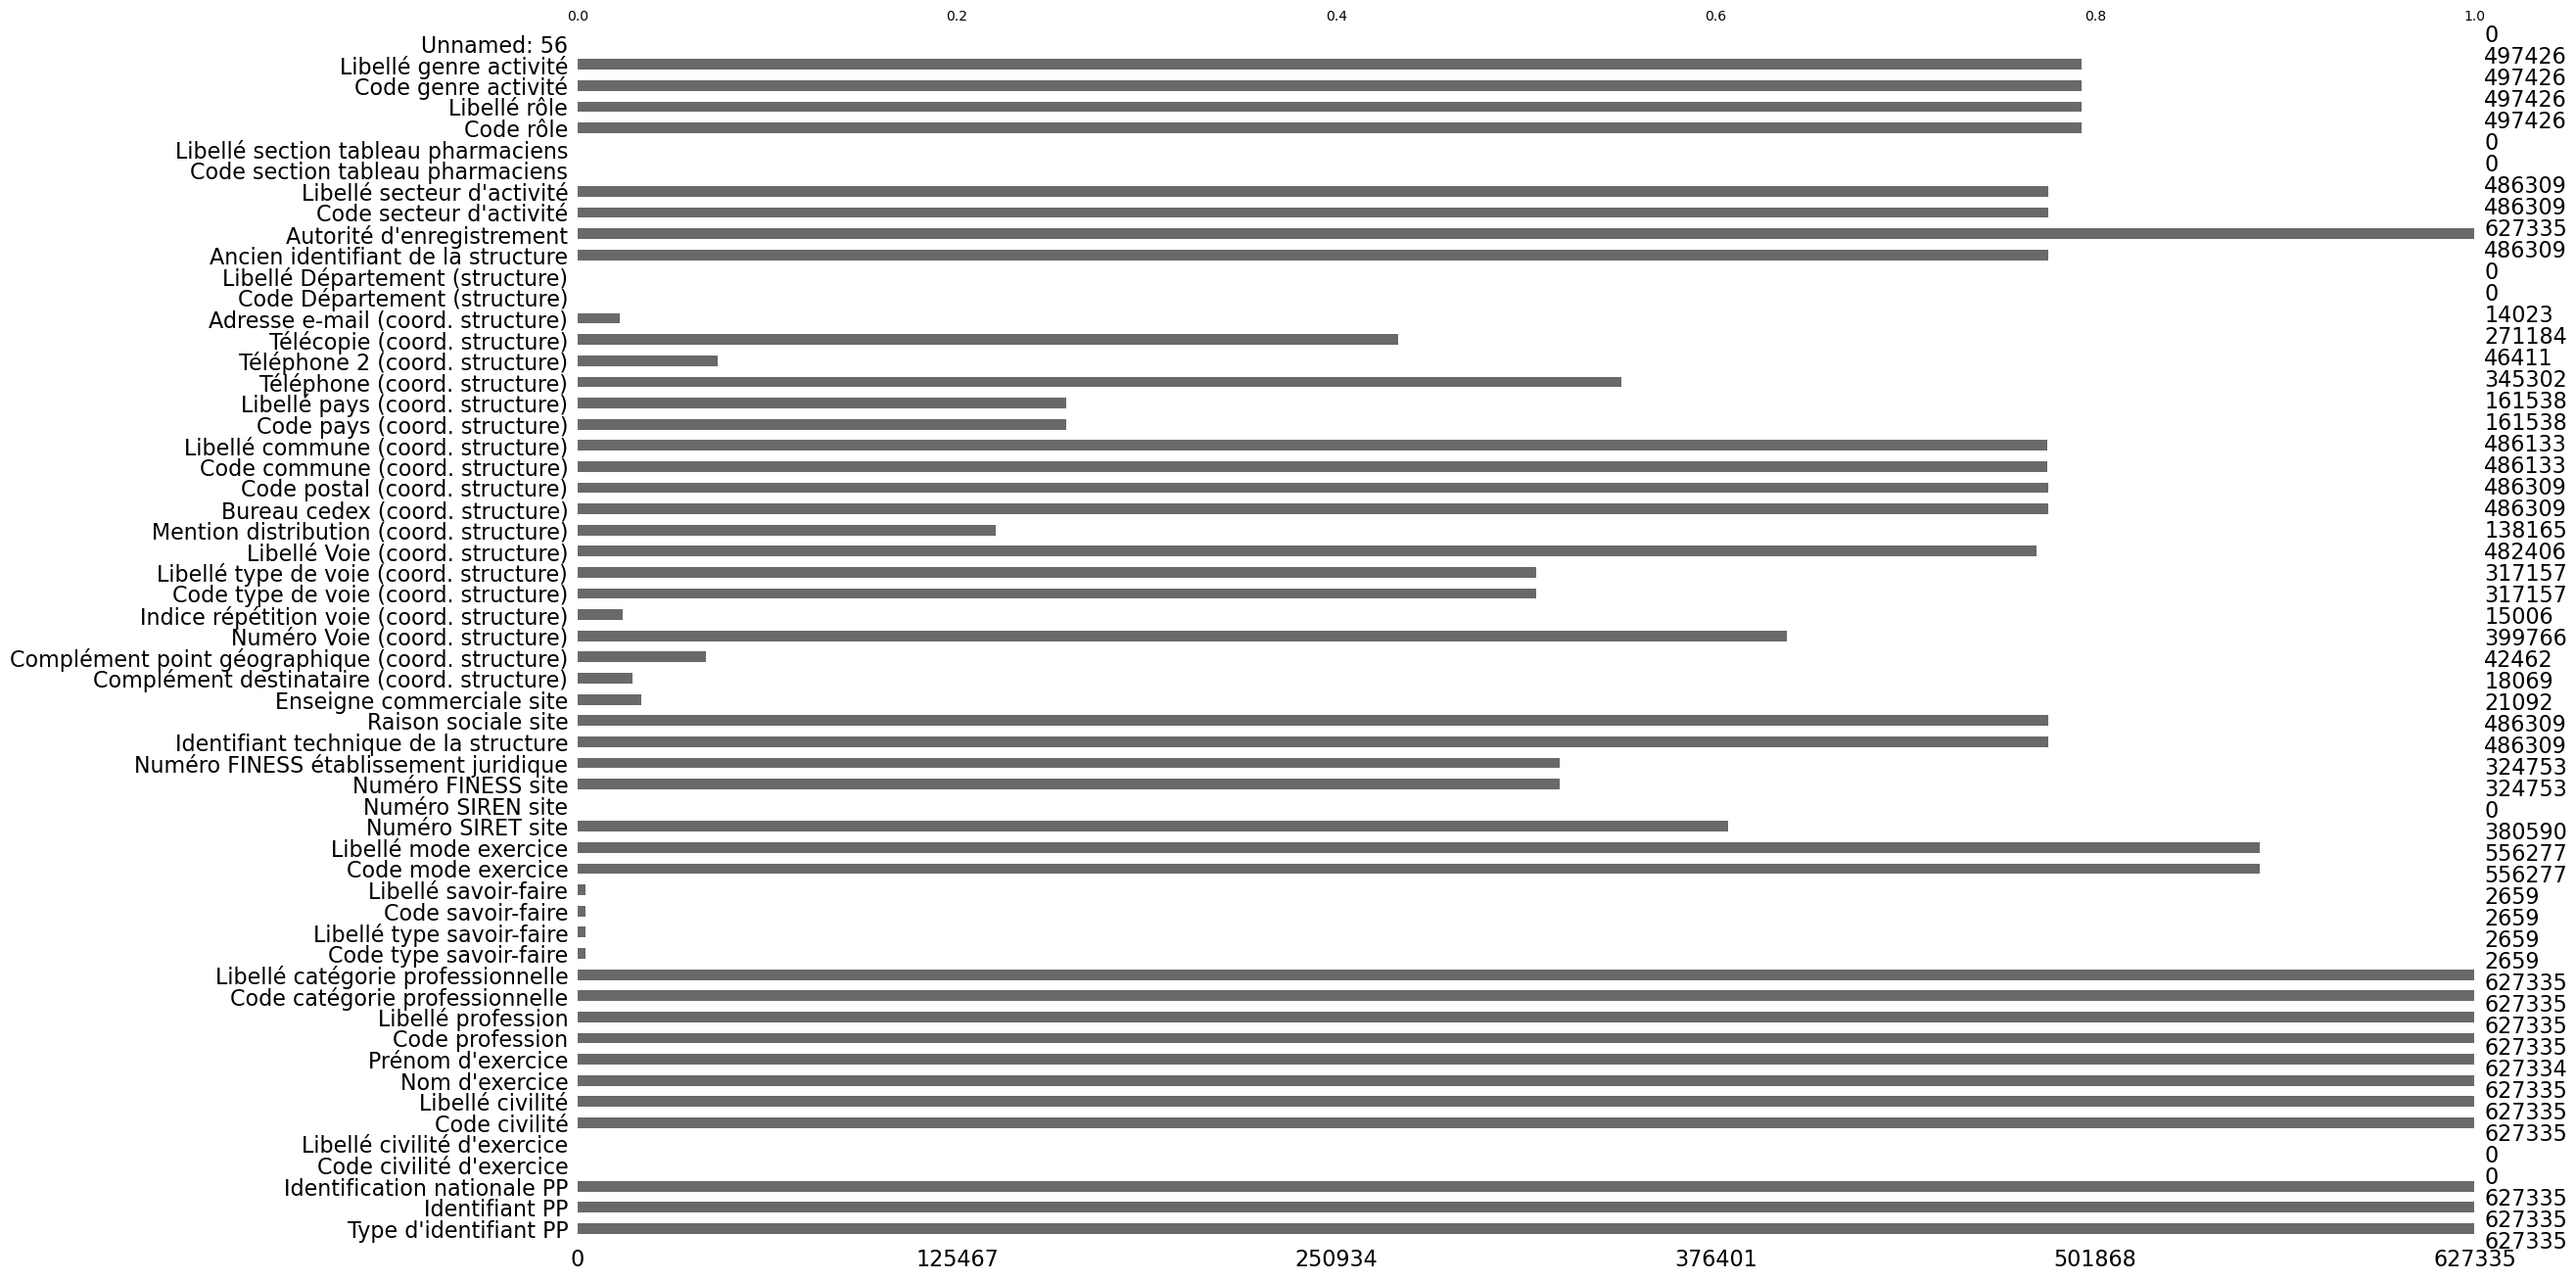

In [5]:
msno.bar(df_PS[df_PS['Code profession']=='60'])

In [6]:
df_communes['population']=df_communes['population'].astype('int64')
df_arrondissements_paris['Population municipale']=df_arrondissements_paris['Population municipale'].astype('int64')

In [7]:
df_PS = df_PS[df_PS['Code catégorie professionnelle']=='C']

In [8]:
df_arrondissements_paris['code_insee']=df_arrondissements_paris['Code département']+df_arrondissements_paris['Code commune']

SUPPRESSION DES COLONNES NON-PERTINENTES

In [9]:
cols_communes_a_supprimer = ['Unnamed: 0',
                            'nom_sans_pronom', 
                            'nom_a',
                            'nom_de', 
                            'nom_sans_accent', 
                            'nom_standard_majuscule',
                            'typecom',
                            'typecom_texte',
                            'canton_code', 
                            'canton_nom', 
                            'epci_code', 
                            'epci_nom', 
                            'academie_code',
                            'academie_nom',
                            'codes_postaux', 
                            'zone_emploi',
                            'code_insee_centre_zone_emploi', 
                            'code_unite_urbaine',
                            'nom_unite_urbaine', 
                            'taille_unite_urbaine',
                            'type_commune_unite_urbaine', 
                            'statut_commune_unite_urbaine',
                            'gentile', 
                            'url_wikipedia', 
                            'url_villedereve',
                            'niveau_equipements_services', 
                            'niveau_equipements_services_texte']


cols_PS_a_supprimer =      ['Type d\'identifiant PP', 
                            'Identification nationale PP',  
                            'Code civilité d\'exercice',	
                            'Libellé civilité d\'exercice',
                            'Code catégorie professionnelle',
                            'Libellé catégorie professionnelle', 
                            'Code type savoir-faire',
                            'Libellé type savoir-faire', 
                            'Numéro SIRET site', 'Numéro SIREN site', 
                            'Numéro FINESS site',
                            'Numéro FINESS établissement juridique',
                            'Identifiant technique de la structure', 
                            'Enseigne commerciale site',
                            'Complément destinataire (coord. structure)',
                            'Complément point géographique (coord. structure)',
                            'Indice répétition voie (coord. structure)',
                            'Code type de voie (coord. structure)',
                            'Libellé type de voie (coord. structure)',
                            'Mention distribution (coord. structure)',
                            'Bureau cedex (coord. structure)', 
                            'Code pays (coord. structure)', 
                            'Libellé pays (coord. structure)',
                            'Téléphone 2 (coord. structure)',
                            'Télécopie (coord. structure)', 
                            'Code Département (structure)',
                            'Libellé Département (structure)',
                            'Ancien identifiant de la structure', 
                            'Autorité d\'enregistrement',
                            'Code section tableau pharmaciens',
                            'Libellé section tableau pharmaciens', 
                            'Code rôle', 
                            'Libellé rôle',
                            'Code genre activité', 
                            'Libellé genre activité', 
                            'Unnamed: 56']

cols_arr_a_supprimer =     ['Code région', 
                            'Nom de la région', 
                            'Code département',
                            'Code arrondissement', 
                            'Code canton', 
                            'Code commune',
                            'Population comptée à part',
                            'Population totale']

In [10]:
df_communes=df_communes.drop(columns=cols_communes_a_supprimer)
df_PS = df_PS.drop(columns=cols_PS_a_supprimer)
df_arrondissements_paris= df_arrondissements_paris.drop(columns=cols_arr_a_supprimer)

AJOUT DES COLONNES PERTINENTES POUR LA SUITE 

In [11]:
def get_code_pop(p):
    if p<2000:
        return '1 - commune'
    elif (p<5000):
        return '2 - bourg'
    elif (p<20000):
        return "3 - petite ville"
    elif (p<50000):
        return '4 - ville moyenne'
    elif (p<200000):
        return '5 - grande ville'
    else :
        return '6 - metropole'

In [12]:
df_communes['taille_commune']=df_communes['population'].apply(lambda x : get_code_pop(x))

In [13]:
df_communes.to_csv('csv/communes.csv', sep=";",index=False)
df_arrondissements_paris.to_csv('csv/arrondissements.csv', sep=";",index=False)
df_PS.to_csv('csv/PS_civils.csv', sep=";",index=False)

POPULATION PAR DEPARTEMENT, PAR REGION ET PAR ARRONDISSEMENT DE PARIS

In [14]:
df_population_par_ville = df_communes.groupby(['code_insee', 'nom_standard'])['population'].sum().reset_index()
df_population_par_dep   = df_communes.groupby(['dep_code','dep_nom'])["population"].sum().reset_index()
df_population_par_reg   = df_communes.groupby(['reg_code','reg_nom'])["population"].sum().reset_index()

MULTISITES

In [15]:
df_PS_duplicate = df_PS.groupby(['Identifiant PP','Nom d\'exercice','Libellé profession','Libellé savoir-faire'])['Identifiant PP'].count().reset_index(name='count')

In [16]:
df_PS_duplicate.to_csv("csv/PS_multisites.csv", index=False)

NOMBRE DE PS PAR DEPARTEMENT ET PAR REGION

In [17]:
df_PS_communes = df_PS.merge(df_communes,left_on=['Code commune (coord. structure)'], right_on=['code_insee'])

df_PS_par_dep= df_PS_communes.groupby(['dep_code','dep_nom', 'Libellé profession','Libellé savoir-faire','Libellé civilité','Libellé mode exercice'],dropna=False)["Identifiant PP"].count().reset_index()
df_PS_par_reg= df_PS_communes.groupby(['reg_code','reg_nom', 'Libellé profession','Libellé savoir-faire','Libellé civilité','Libellé mode exercice'],dropna=False)["Identifiant PP"].count().reset_index()
df_PS_par_com= df_PS_communes.groupby(['Code commune (coord. structure)','Libellé profession','Libellé savoir-faire','Libellé civilité','Libellé mode exercice'],dropna=False)["Identifiant PP"].count().reset_index()

In [18]:
df_PS_par_dep['Libellé profession'].value_counts()

Libellé profession
Médecin                                               16319
Infirmier                                              1166
Chirurgien-Dentiste                                     958
Pharmacien                                              403
Masseur-Kinésithérapeute                                401
Psychologue                                             401
Opticien-Lunetier                                       400
Psychothérapeute                                        393
Audio-Prothésiste                                       387
Ergothérapeute                                          384
Psychomotricien                                         383
Diététicien                                             381
Sage-Femme                                              368
Ostéopathe                                              363
Orthophoniste                                           361
Acteur du système de santé caractérisé par un rôle      358
Orthoptiste          

In [19]:
#df_PS_par_dep_nunique= df_PS_communes.groupby(['dep_code','dep_nom', 'Libellé profession','Libellé savoir-faire','Libellé civilité','Libellé mode exercice'])["Identifiant PP"].nunique().reset_index()


In [20]:
df_PS_par_dep_avec_pop = df_PS_par_dep.merge(df_population_par_dep,on=['dep_code'])
df_PS_par_reg_avec_pop = df_PS_par_reg.merge(df_population_par_reg,on=['reg_code'])
df_PS_par_com_avec_pop = df_PS_par_com.merge(df_population_par_ville,left_on=['Code commune (coord. structure)'], right_on=['code_insee'])

PARIS C'EST SPECIAL

In [21]:
df_PS_par_arr =df_PS.groupby(['Code commune (coord. structure)','Libellé commune (coord. structure)', 'Libellé profession','Libellé savoir-faire','Libellé civilité','Libellé mode exercice'])["Identifiant PP"].count().reset_index()

In [22]:

df_PS_par_arr_avec_pop = df_PS_par_arr.merge(df_arrondissements_paris,left_on=['Code commune (coord. structure)'], right_on=['code_insee'])

CALCUL DU RATIO POUR 1000 HABITANTS

In [23]:
df_PS_par_dep_avec_pop['ratio']=df_PS_par_dep_avec_pop.apply(lambda x: x["Identifiant PP"]/x["population"]*1000, axis=1)
df_PS_par_reg_avec_pop['ratio']=df_PS_par_reg_avec_pop.apply(lambda x: x["Identifiant PP"]/x["population"]*1000, axis=1)
df_PS_par_arr_avec_pop['ratio']=df_PS_par_arr_avec_pop.apply(lambda x: x["Identifiant PP"]/x["Population municipale"]*1000, axis=1)


In [24]:
df_PS_par_dep_avec_pop=df_PS_par_dep_avec_pop.drop(columns=['dep_nom_y'])
df_PS_par_reg_avec_pop=df_PS_par_reg_avec_pop.drop(columns=['reg_nom_y'])
df_PS_par_arr_avec_pop=df_PS_par_arr_avec_pop.drop(columns=['code_insee'])

EXPORT CSV POUR LA SUITE

In [25]:
df_PS_par_dep_avec_pop.to_csv('csv/df_PS_par_dep_avec_pop.csv', sep=";",index=False)
df_PS_par_reg_avec_pop.to_csv('csv/df_PS_par_reg_avec_pop.csv', sep=";",index=False)
df_PS_par_arr_avec_pop.to_csv('csv/df_PS_par_arr_avec_pop.csv', sep=";",index=False)
df_PS_par_com_avec_pop.to_csv('csv/df_PS_par_com_avec_pop.csv', sep=";",index=False)